<a href="https://colab.research.google.com/github/askmuhsin/AI-toolkit-MFS/blob/master/S11/opencv_yolo/01_opencv_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Following this blog for yolo implementation on opencv.  
`https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/`

In [1]:
! git clone https://github.com/eva7wandb/Eva7_Weights_Heist

Cloning into 'Eva7_Weights_Heist'...
remote: Enumerating objects: 618, done.
remote: Counting objects: 100% (618/618), done.
remote: Compressing objects: 100% (539/539), done.
remote: Total 618 (delta 261), reused 240 (delta 63), pack-reused 0
Receiving objects: 100% (618/618), 11.49 MiB | 18.32 MiB/s, done.
Resolving deltas: 100% (261/261), done.


In [2]:
! wget https://pjreddie.com/media/files/yolov3.weights
! mv ./yolov3.weights ./Eva7_Weights_Heist/S11/opencv_yolo/artifacts/
%cd ./Eva7_Weights_Heist/S11/opencv_yolo/
%pwd

--2021-12-18 05:12:21--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  76.1MB/s    in 3.3s    

2021-12-18 05:12:24 (72.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

/content/Eva7_Weights_Heist/S11/opencv_yolo


'/content/Eva7_Weights_Heist/S11/opencv_yolo'

In [3]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load Yolo
net = cv2.dnn.readNet("./artifacts/yolov3.weights", "./artifacts/yolov3.cfg")

In [9]:
classes = []
with open("./artifacts/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
print(classes[:4], len(classes))

['person', 'bicycle', 'car', 'motorbike'] 80


In [10]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [11]:
def infer_and_annotate(img_path):
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_DUPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 0.7, color, 1)
            print(label, x, y, w, h)
    
    return img

In [15]:
image_file = './test_image.jpg' ## default image

## to upload a custom image uncomment the below
# uploaded_image = upload_files()
# image_file = uploaded_image[0]

In [16]:
ret_img = infer_and_annotate(image_file)

tvmonitor 3 61 100 70
person 107 60 118 144
chair 248 64 151 181
laptop 135 129 60 35
bottle 332 154 26 80
book 117 209 58 36
bowl 261 225 63 44
cell phone 134 245 46 34
remote 185 210 26 25


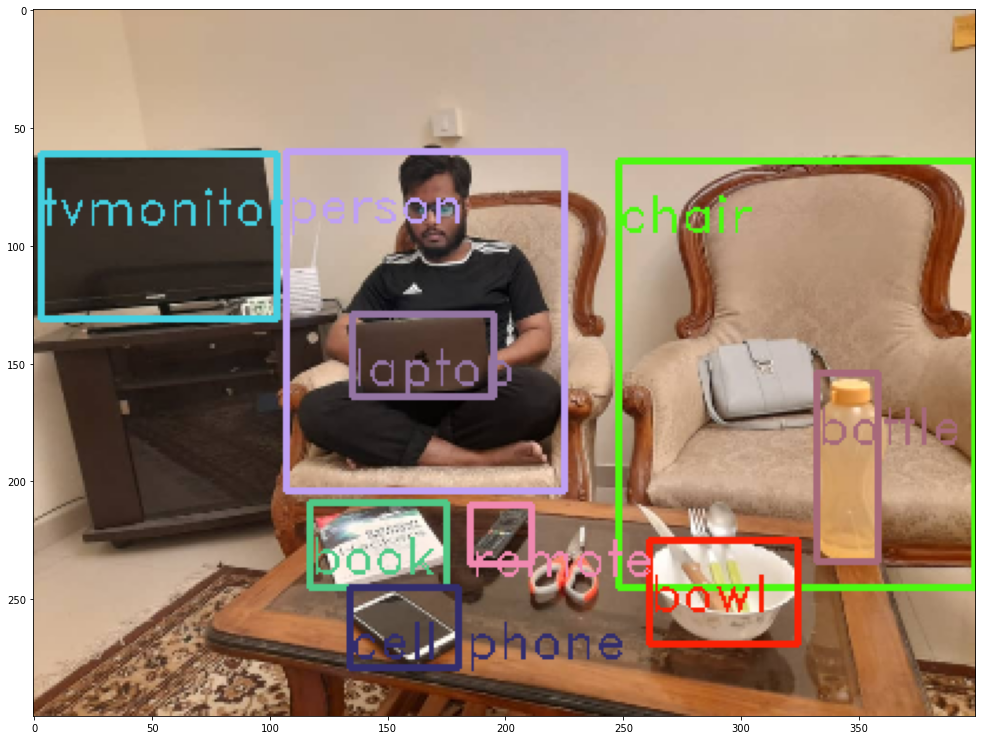

In [17]:
plt.figure(figsize=(17, 13))
plt.imshow(cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB))